In [1]:
!pip install robustness

     |████████████████████████████████| 81kB 2.1MB/s 
     |████████████████████████████████| 460kB 7.7MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 204kB 14.6MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
  Created wheel for GPUtil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7413 sha256=732c322b25deb91ad295ba2ebae6e3231a57f0e005d536f652fb9cb55815bfff
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built GPUtil


In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from robustness.model_utils import make_and_restore_model
from robustness.datasets import CIFAR
from tqdm import tqdm

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor()
     
     ])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)


testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [0]:
device = torch.device("cuda:0")

In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [8]:
ds = CIFAR('data') 
model, _ = make_and_restore_model(arch='resnet50', dataset=ds, resume_path='/content/drive/My Drive/cifar_l2_0_25.pt')
model.eval()
model.to(device)

=> loaded checkpoint '/content/drive/My Drive/cifar_l2_0_25.pt' (epoch 105)


DataParallel(
  (module): AttackerModel(
    (normalizer): InputNormalize()
    (model): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (layer1): SequentialWithArgs(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (shortcut): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bia

In [9]:
_, test_loader = ds.make_loaders(workers=0, batch_size=1, shuffle_train=False, shuffle_val=False)
_, test_loader_shuffled = ds.make_loaders(workers=0, batch_size=1, shuffle_train=True, shuffle_val=True)

==> Preparing dataset cifar..
Files already downloaded and verified
Files already downloaded and verified
==> Preparing dataset cifar..
Files already downloaded and verified
Files already downloaded and verified


In [10]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, 
                                             transform=transform)
train_batch_gen = torch.utils.data.DataLoader(train_dataset, 
                                              batch_size=1,
                                              shuffle=True,
                                              num_workers=4)


Files already downloaded and verified


In [0]:
def compute_accuracy(logits, y_true, device='cuda:0'):
    y_pred = torch.argmax(logits, dim=1)
    y_true_on_device = y_true.to(device)
    accuracy = (y_pred == y_true_on_device).float().mean()
    return accuracy

In [0]:
criterion = nn.MSELoss()

In [0]:
lr = 0.1
eps = 0.5
train_loader_shuffled = torch.utils.data.DataLoader(train_dataset, 
                                              batch_size=100,
                                              shuffle=True,
                                              num_workers=4)

In [0]:
#генерация робустного датасета
# val_accuracy = []
robust_ds = []

# val_accuracy_batch = []
# X_batch, y_batch = next(iter(test_loader))
# for i in tqdm(range(len(test_loader))):
count_count = 0
for i, (X_batch, y_batch) in tqdm(enumerate(train_batch_gen)):
    
    
    
    X_rand_batch, _ = next(iter(train_loader_shuffled))
    X_rand_batch = torch.mean(X_rand_batch,0).clone()#torch.tensor(np.random.rand((3*32*32)))#, y_rand_batch = next(iter(test_loader_shuffled))
    X_rand_batch = X_rand_batch.reshape(1,3,32,32)
    X_rand_batch=X_rand_batch.float()
    X_rand_batch.requires_grad_(True)
    # print(X_batch)
    # print(X_rand_batch)
    X_batch_gpu = X_batch.to(device)
    X_rand_batch_gpu = X_rand_batch.to(device)





   
    
    # print(criterion(model(X_batch_gpu)[0], model(X_rand_batch_gpu)[0]))
    # while criterion(model(X_batch_gpu).view(-1), model(X_rand_batch_gpu).view(-1)) > eps:
    n = 0
    while n < 100:
        X_rand_batch_gpu = X_rand_batch_gpu.detach().cpu()#np.clip(X_rand_batch_gpu.detach().cpu(), 0, 1)
        X_rand_batch_gpu.requires_grad_(True)
        logits = model(X_batch_gpu)[0]
        
        logits_rand = model(X_rand_batch_gpu)[0]
        loss = criterion(logits, logits_rand)
        grad = torch.autograd.grad(loss, X_rand_batch_gpu)
        # loss.zero_grad()
        x_clone = X_rand_batch_gpu.clone()
        x_clone -= lr*np.sign(grad[0])
        X_rand_batch_gpu = x_clone.clone()
        n = n + 1
        if n ==100:
          lr=lr*0.1
        if n ==200:
          lr=lr*0.1
        if n ==300:
          lr=lr*0.1
        if n ==400:
          lr=lr*0.1

    robust_ds.append([X_rand_batch_gpu, y_batch])
    if count_count % 1000 == 0:
      torch.save(robust_ds, 'robust_set_noise.pt')
    count_count+=1
    # logits = model(X_batch_gpu)[0]

    # accuracy = compute_accuracy(logits, y_batch, device=device)
    # val_accuracy_batch.append(accuracy.item())
          
# val_accuracy_overall = np.mean(val_accuracy_batch) * 100
# val_accuracy.append(val_accuracy_overall.item())




2it [00:10,  5.46s/it]

KeyboardInterrupt: ignored

In [0]:
model.to(device)
non_robust_ds = []
crit = nn.MSELoss()
lr = 0.2
for i, (X_batch, y_batch) in tqdm(enumerate(train_batch_gen)):
    
    X_rand_batch, _ = next(iter(train_loader_shuffled))
    
    
    X_batch_gpu = X_batch.to(device)
    #print(X_batch.numpy().shape)
    a = torch.mean(X_rand_batch,0).clone()
    X_rand_batch_gpu = a.reshape(1,3,32,32)
    #print(X_rand_batch_gpu.shape)
    X_rand_batch_gpu.requires_grad=True
    X_rand_batch_gpu=X_rand_batch_gpu.float().to(device)
    

    #x_gpu = X_rand_batch_gpu.clone()
    #x_pred_gpu = x_gpu.clone()
    logits_true = model(X_batch_gpu)[0]
    logits_true = logits_true.detach()
    #print('bum')
    for q in range(50):
        #print('pum')
        X_rand_batch_gpu.requires_grad_(True)
        logits = model(X_rand_batch_gpu)[0]
        l = crit(logits, logits_true)
        #loss = criterion(logits, t)
        #l.backward(retain_graph=True)

        grad = torch.autograd.grad(l, X_rand_batch_gpu)
        x = X_rand_batch_gpu.detach().cpu().numpy()
        x = np.add(x, -lr*grad[0].detach().cpu().numpy())#, casting='unsafe')
        x = np.clip(x, X_batch_gpu.detach().cpu().numpy() - eps, X_batch_gpu.detach().cpu().numpy() + eps)
        x = np.clip(x, 0, 1) # ensure valid pixel range
        X_rand_batch_gpu = torch.tensor(x).to(device)

        #if torch.norm(x_gpu - x_pred_gpu) < 10**(-3):
        X_rand_batch_gpu.requires_grad_(True)
        #l.zero_grads()

    non_robust_ds.append([X_rand_batch_gpu.cpu().detach().numpy(), y_batch.item()])
    if i%100 ==0:
      torch.save(non_robust_ds, '/content/drive/My Drive/Rrr_train.pt')
torch.save(non_robust_ds, '/content/drive/My Drive/Rrr_train_all.pt')

Streaming output truncated to the last 5000 lines.





8038it [5:00:32,  2.24s/it]







8039it [5:00:34,  2.25s/it]







8040it [5:00:36,  2.26s/it]







8041it [5:00:39,  2.26s/it]







8042it [5:00:41,  2.25s/it]







8043it [5:00:43,  2.25s/it]







8044it [5:00:46,  2.26s/it]







8045it [5:00:48,  2.25s/it]







8046it [5:00:50,  2.25s/it]







8047it [5:00:52,  2.25s/it]







8048it [5:00:55,  2.26s/it]







8049it [5:00:57,  2.25s/it]







8050it [5:00:59,  2.26s/it]







8051it [5:01:01,  2.25s/it]







8052it [5:01:03,  2.24s/it]







8053it [5:01:06,  2.24s/it]







8054it [5:01:08,  2.23s/it]







8055it [5:01:10,  2.23s/it]







8056it [5:01:12,  2.24s/it]







8057it [5:01:15,  2.25s/it]







8058it [5:01:17,  2.26s/it]







8059it [5:01:19,  2.26s/it]







8060it [5:01:22,  2.26s/it]







8061it [5:01:24,  2.24s/it]







8062it [5:01:26,  2.24s/it]







8063it [5:01:28,  2.23s/it]







8064it [5:01:30,  2.25s/it]








5

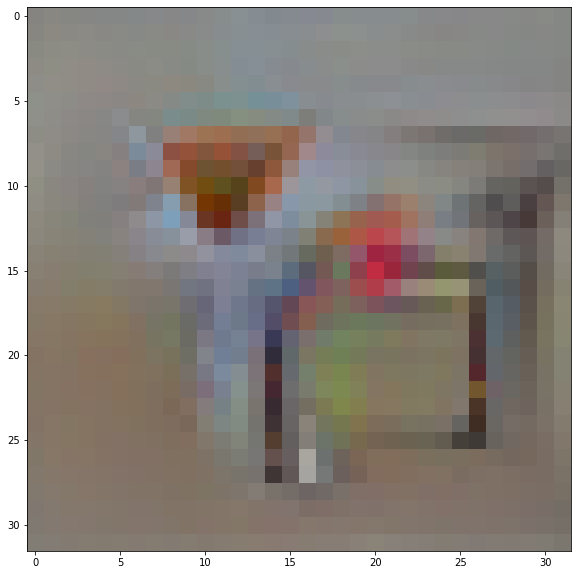

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
x = dset[7][0]
#x=x.reshape(1,3,32,32)
#X, t = attack.perturb(x, y, labels, model2.to(device))
pic_np = x.reshape(3, 32,32)#.detach().cpu().numpy().reshape(3, 32,32)
pic_np = np.rollaxis(pic_np, 0, 3)    # 3xHxW to HxWx3
ax.imshow(pic_np)
#title = class_names[y] + '+' + class_names[y.item()]
#ax.set_title(title)
dset[7][1]

In [0]:

dset = torch.load('/content/drive/My Drive/Rrr_train.pt')

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])


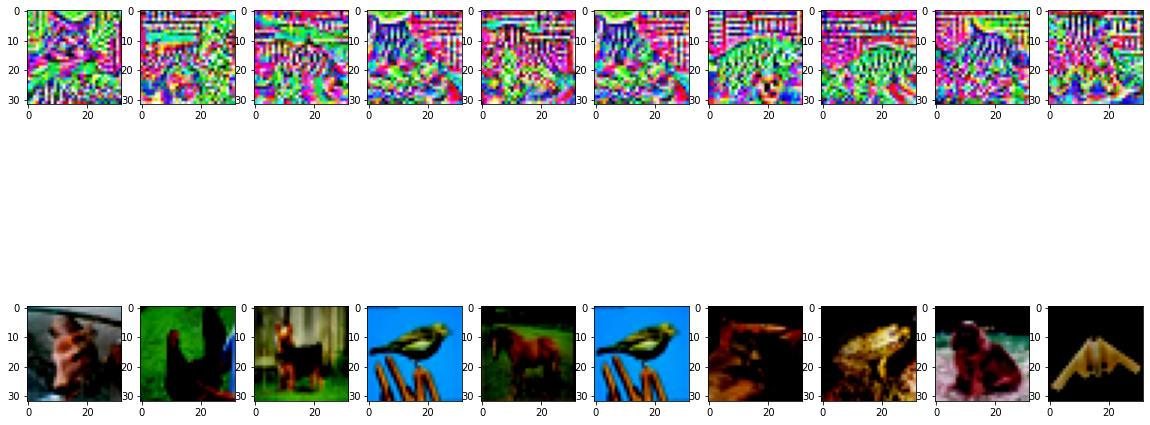

In [0]:
n_pics_to_show = 10
fig, ax = plt.subplots(2, n_pics_to_show, figsize=(20, 10))

for i in range(n_pics_to_show):
    rand_idx = np.random.randint(len(robust_ds))

    pic = robust_ds[rand_idx][0]
    pic2 = testset[rand_idx][0]
    print(pic2.shape)

    pic_np = pic.cpu().data.numpy()

    pic_np = np.rollaxis(pic_np, 0, 3) # 3xHxW to HxWx3

    pic_np2 = pic2.cpu().data.numpy()
    pic_np2 = np.rollaxis(pic_np2, 0, 3) # 3xHxW to HxWx3

    ax[0, i].imshow(pic_np)


    ax[1, i].imshow(pic_np2)

